In [39]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

training_data = pd.read_csv("../Data/LargeTrainingData.csv")

#we can either use Small training data or Large Training Data

# training_data = pd.read_csv("../Data/TrainingData.csv")



class LogisticRegression: 
    #creating a logReg class and initializing values
    def __init__(self, cut_off_on_fit = True, iterations = 1000 , adjust = 0.01, verbose = False):
        self.adjust = adjust 
        self.iterations = iterations 
        self.cut_off_on_fit = cut_off_on_fit
        self.verbose = verbose


    #this function takes on real numbers and returns normalized logit values between 0 and 1
    def sigmoid_func(self, n): 
        value = 1/(1 + np.exp(-n))
        return value 

    #this function determines the gap between the desired value and the currently obtained value along the logit curve
    #generates probabilities for each iteration 
    def loss_func(h_value , y_value): 
        value = 1 - y_value
        log_component = np.log(1 - h_value)
        y_logged = -y_value * np.log(h_value)
        value = y_logged - value * log_component
        value = value.mean()
        return value 

    #improves adjustment conditions to allow fitting the model accurately to the data set
    def fit_on(self , x_value): 
        adjust = np.ones((x_value.shape[0], 1))
        return np.concatenate((adjust, x_value), axis = 1)

    def fit_bounds(self, x_value, y_value):
        if self.cut_off_on_fit: 
            x_value = self.fit_on(x_value)

# loss_func(0.62, 0.77)


    def gradient_descent_function(x_value, h_value, y_value):
        return np.dot(x_value.T, (h_value - y_value)) / y_value.shape[0]

    #for each iteration , we transpose our frame and then test for our loss and use that to adjust and fit unto our logit curve, 
    def training_stage(self, x_value, y_value):
        if self.fit_on: 
            x_value = self.fit_on(x_value)

        self.weights = np.zeros(x_value.shape[1])

        for i in range(self.iterations): 
            n = np.dot(x_value, self.weights) 
            h_value = self.sigmoid_func(n)
            m = np.dot(x_value.T, (h_value - y_value)) / y_value.size
            self.weights -= self.adjust * m
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(x_value, self.weights)
                h = self.sigmoid_func(n)
                print(f'loss: {self.loss_func(h_value, y_value )} \t')
    #fitting model to data set

    def prediction_prob_func(self, x_value): 
        if self.cut_off_on_fit: 
            x_value = self.fit_on(x_value)

        return self.sigmoid_func(np.dot(x_value, self.weights))

    def predict(self, x_value, threshold): 
        return self.prediction_prob_func(x_value) >= threshold








In [40]:
#training features
features = training_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count", "home_team_result"  ], axis=1)
targets = training_data['home_team_result'].values 
training_features , training_targets = features, targets

#testing features
testing_data = pd.read_csv("../Data/TestingData.csv")
target_from_old_csv  = pd.read_csv('../Data/Dataset.csv')["home_team_result"].tail(16).values

#defining features and targets to be tested against
test_features = testing_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count" ], axis=1)
test_target = target_from_old_csv
testing_features, testing_targets = test_features, test_target

#calling and applying logistic regression model

lr_from_scratch = LogisticRegression(adjust = 0.001, iterations = 30000)
lr_from_scratch.training_stage(training_features, training_targets)

prediction_sequence = lr_from_scratch.prediction_prob_func(testing_features)
prediction_sequence = prediction_sequence.flatten()

# lr_from_scratch.training_stage(training_features, training_targets)

# print(prediction_sequence)

roundup  = [round(sequence_item) for sequence_item in prediction_sequence]
target_predictions = [int(sequence_item) for sequence_item in roundup]
#printing to view the predictions as a 0 or 1

print(testing_targets)
print(target_predictions)

# print(int_values)

match = accuracy_score(testing_targets, target_predictions, normalize = False)

print(match)

percentage = match / 16

print(percentage)


[1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
11
0.6875


In [41]:
# Generate graphs
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(target_predictions,testing_targets)

print(cf_matrix)


[[2 2]
 [3 9]]


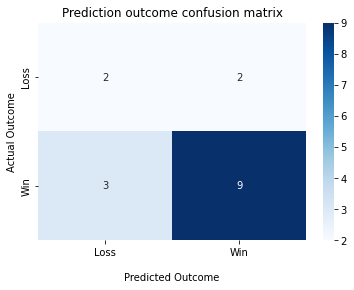

In [42]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Prediction outcome confusion matrix')
ax.set_xlabel('\nPredicted Outcome')
ax.set_ylabel('Actual Outcome');

ax.xaxis.set_ticklabels(['Loss','Win'])
ax.yaxis.set_ticklabels(['Loss','Win'])

plt.show()
# fig = plt.figure()
# fig.savefig("anything.png")

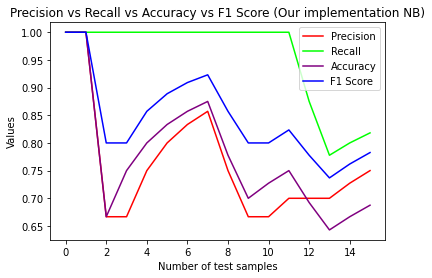

In [43]:
# Precision and Recall
def precisionAndRecall(predictedValues):
    actualValues = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    truePositives = 0
    trueNegatives = 0
    falsePositives = 0
    falseNegatives = 0
    precision = []
    recall = []
    accuracy = []
    f1 = []

    for index in range(len(predictedValues)):
        if(predictedValues[index]==1 and actualValues[index]==1):
            truePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
            
        
        if(predictedValues[index]==1 and actualValues[index]==0):
            falsePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
        
        if(predictedValues[index]==0 and actualValues[index]==0):
            trueNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

        if(predictedValues[index]==0 and actualValues[index]==1):
            falseNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

    return precision,recall,accuracy,f1

precision, recall, accuracy, f1 = precisionAndRecall(target_predictions)

plt.title("Precision vs Recall vs Accuracy vs F1 Score (Our implementation NB)")
plt.xlabel("Number of test samples")
plt.ylabel("Values")
plt.plot(precision,color = "red", label = "Precision")
plt.plot(recall,color = "lime", label = "Recall")
plt.plot(accuracy,color = "purple", label = "Accuracy")
plt.plot(f1,color = "blue", label = "F1 Score")

plt.legend()
plt.show()
